# Example of a Row in the PaySim Fraud Detection Dataset

| Column           | Example Value        | Description                                                                 |
|------------------|----------------------|-----------------------------------------------------------------------------|
| `Step`           | 1                    | Maps a unit of time in the real world. In this case, 1 step is 1 hour of time. |
| `Type`           | PAYMENT              | Type of transaction: `CASH-IN`, `CASH-OUT`, `DEBIT`, `PAYMENT`, `TRANSFER`. |
| `Amount`         | 1060.31              | Amount of the transaction in local currency.                                |
| `NameOrig`       | C429214117           | Name/ID of the Sender.                  |
| `OldbalanceOrg`  | 1089.0               | Sender balance before the transaction took place.
| `NewbalanceOrig` | 28.69                | New balance after the transaction.                                           |
| `NameDest`       | M1591654462          | Name/ID of the Recipient.
| `OldbalanceDest` | 0.0                  | Recipient balance after the transaction took place.
| `NewbalanceDest` | 0.0                  | New balance recipient after the transaction.                                |
| `isFraud`        | 0 or 1               | This is the transactions made by fraudulent agents marked as `1`
| `isFlaggedFraud` | 0                    | Whether the transaction is flagged as fraud due to a transfer amount greater than 200,000. |


### The `NewbalanceDest` being 0.0 can happen under certain circumstances, such as:

- **No money transferred to the recipient in that specific transaction.**
- **The transaction was reversed or was a non-transactional operation.**
- **The recipient's balance remained unchanged** if there were no credits or if the money was withdrawn immediately.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("C:/Machine Learning Projects/Fraud Detection using Machine Learning/data/Imported_data.csv")
display(df.head())      ## (or) df.head() This will display the first 5 rows of the dataset


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


## Last Five records of the dataset

In [3]:
display(df.tail()) 

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


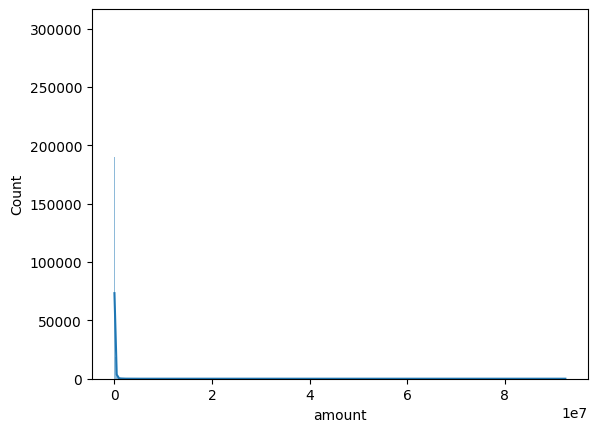

In [4]:
sns.histplot(df['amount'], kde=True)  # kde=True adds a density plot
plt.show()

## Shape of the Dataframe

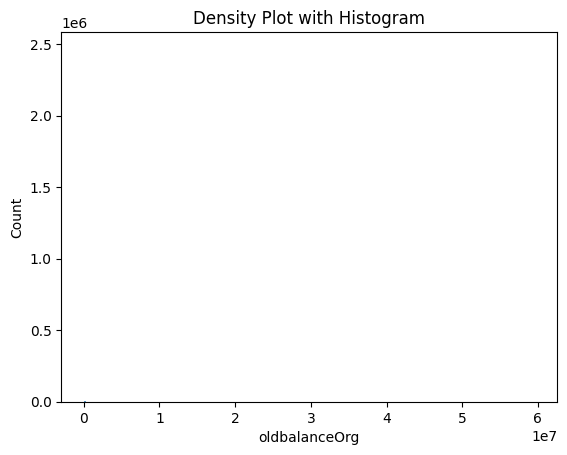

In [3]:
sns.histplot(df['oldbalanceOrg'])
plt.title('Density Plot with Histogram')
plt.show()

In [3]:
rows_in_millions = df.shape[0] / 1000000
print(f"Dataset contains {rows_in_millions:.2f} Million rows and {df.shape[1]} columns.")

Dataset contains 6.36 Million rows and 11 columns.


### Check for Column data types

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
categorical_columns = list(df.select_dtypes(include=['object']))
numerical_columns = df.select_dtypes(exclude=['object']).columns.to_list()

print(f'Categorical datatypes:{categorical_columns}',"\n")
print(f'numerical datatypes:{numerical_columns}',"\n")

print(f'Categorical datatypes:{len(categorical_columns)}',"\n")
print(f'numerical datatypes:{len(numerical_columns)}',"\n")

Categorical datatypes:['type', 'nameOrig', 'nameDest'] 

numerical datatypes:['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud'] 

Categorical datatypes:3 

numerical datatypes:8 



## Columns Present in the dataset

In [6]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

## Statistics of dataset

In [7]:
# Convert the dataframe to millions
summary_stats = df.describe()  # Assuming `df.describe()` is the source of your stats
summary_stats_in_millions = summary_stats / 1000000

# Formatting the columns for better readability
summary_stats_in_millions = summary_stats_in_millions.applymap(lambda x: f"{x:.3f}M" if isinstance(x, (int, float)) else x)

# Display the converted dataframe
summary_stats_in_millions


C:\Users\suman\AppData\Local\Temp\ipykernel_12344\3716548518.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  summary_stats_in_millions = summary_stats_in_millions.applymap(lambda x: f"{x:.3f}M" if isinstance(x, (int, float)) else x)


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.363M,6.363M,6.363M,6.363M,6.363M,6.363M,6.363M,6.363M
mean,0.000M,0.180M,0.834M,0.855M,1.101M,1.225M,0.000M,0.000M
std,0.000M,0.604M,2.888M,2.924M,3.399M,3.674M,0.000M,0.000M
min,0.000M,0.000M,0.000M,0.000M,0.000M,0.000M,0.000M,0.000M
25%,0.000M,0.013M,0.000M,0.000M,0.000M,0.000M,0.000M,0.000M
50%,0.000M,0.075M,0.014M,0.000M,0.133M,0.215M,0.000M,0.000M
75%,0.000M,0.209M,0.107M,0.144M,0.943M,1.112M,0.000M,0.000M
max,0.001M,92.446M,59.585M,49.585M,356.016M,356.179M,0.000M,0.000M


## Missing Values analysis

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


<Axes: >

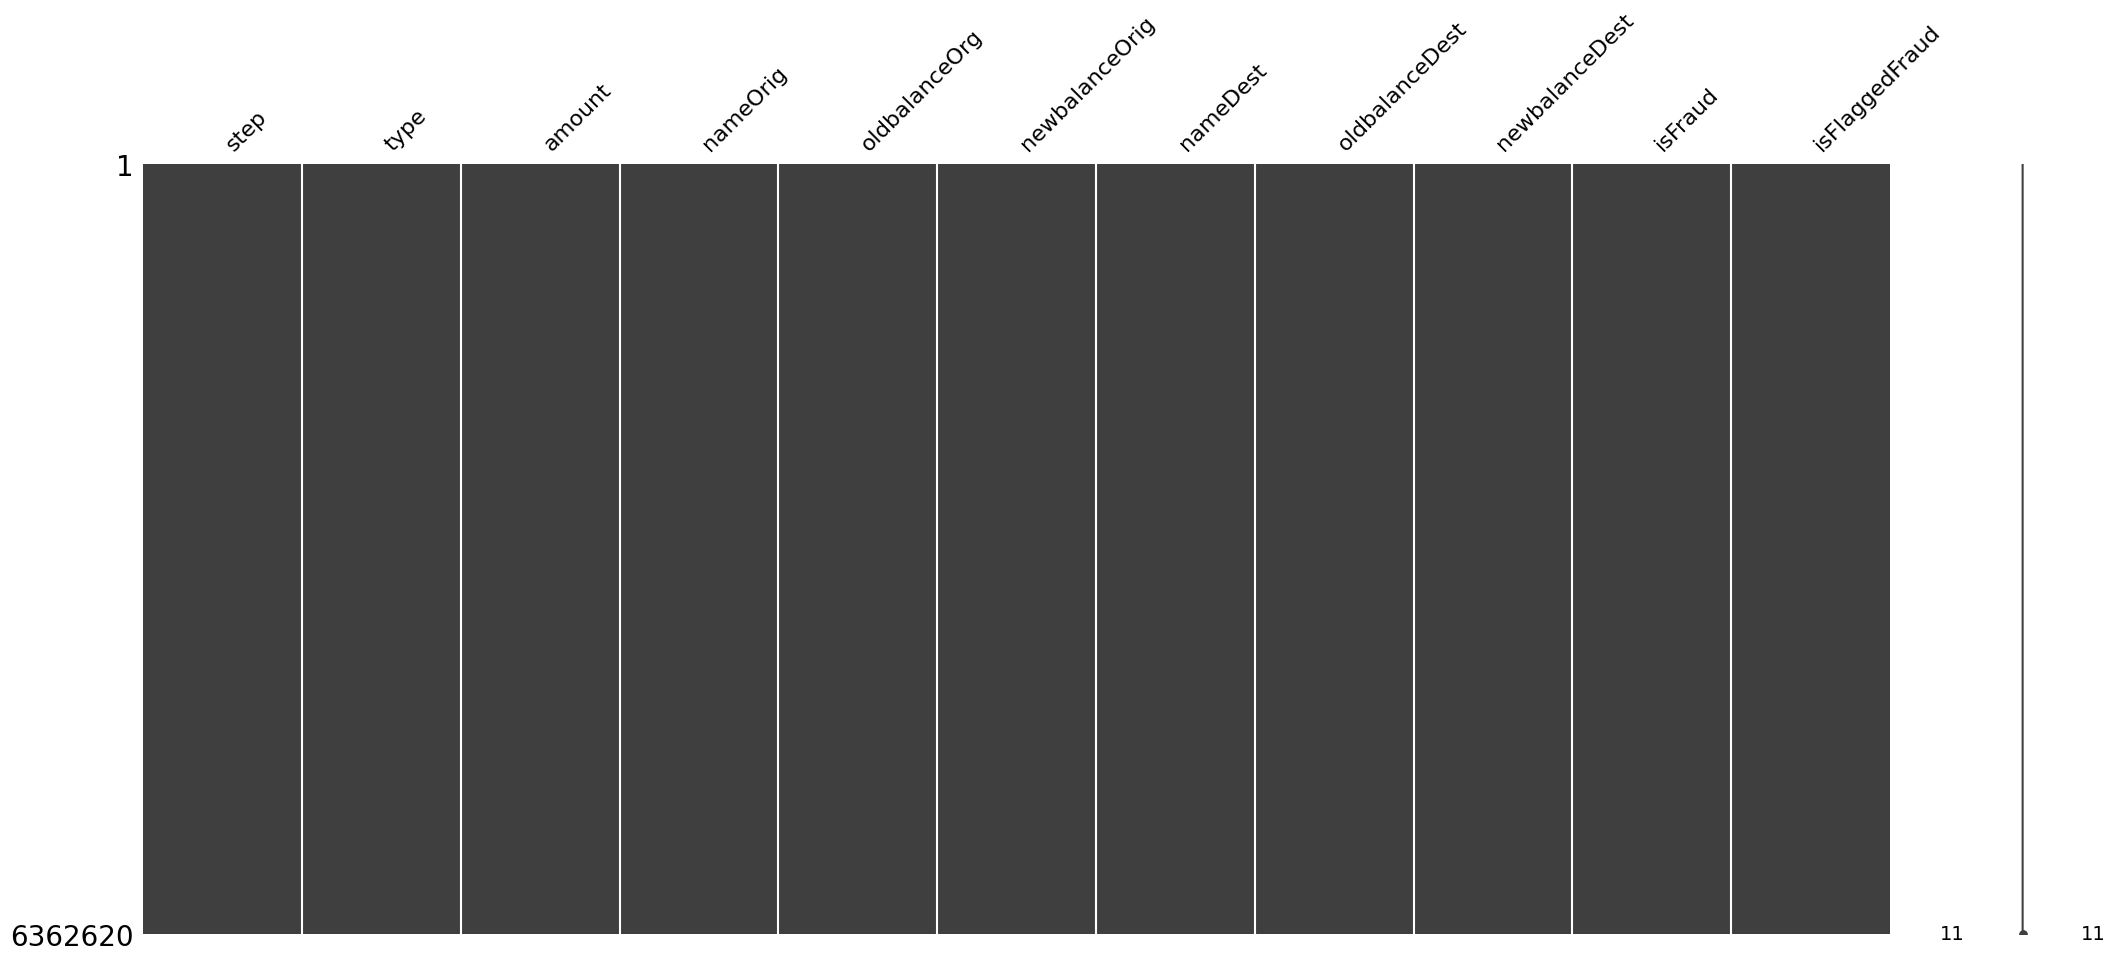

In [8]:
# Check for missing values
print(df.isnull().sum())

# Visualize missing data
import missingno as msno
msno.matrix(df)


## Check for Duplicate records

In [9]:
# Count duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [10]:
df.isFraud.value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

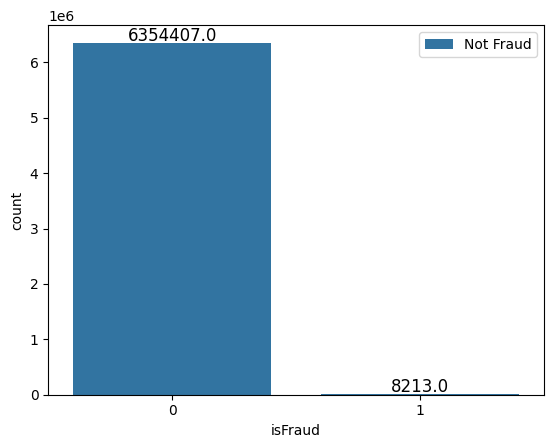

In [6]:
# Create the countplot
ax = sns.countplot(x='isFraud', data=df)

# Add legend
plt.legend(['Not Fraud', 'Fraud'])

# Annotate count values on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), 
                textcoords='offset points')

# Show the plot
plt.show()

### _Observations_

The dataset contains only __8,213 fraudulent transactions__, approximately __0.13%__ of the total records, making it imbalanced. Solutions to address this include:

1. **Resampling Techniques**:
   - **Oversampling** - using methods like SMOTE to increase fraudulent transactions.
   - **Undersampling** - the majority class is reduced, though it may lose valuable data.
   
2. __Use of Class Weights__: Assign higher weights to the minority class to penalize misclassifications.

3. **Anomaly Detection Models**: Apply these techniques to identify rare fraudulent transactions.

4. **Ensemble Methods**: Use models like Random Forests or XGBoost that handle imbalanced datasets effectively.


### Categorical feature distribution (e.g., 'type')

C:\Users\suman\AppData\Local\Temp\ipykernel_13916\3151021710.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='type', data=df, palette='Set2')  # You can choose a different palette if you like


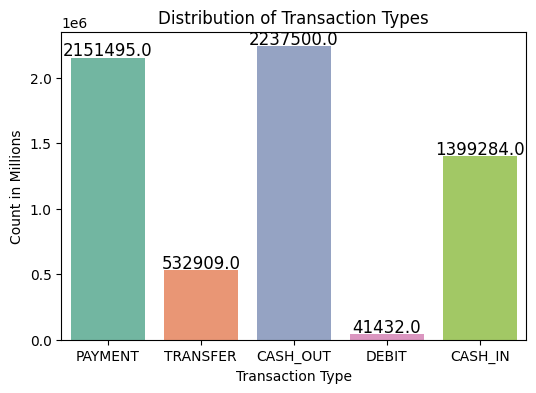

In [7]:
plt.figure(figsize=(6, 4))

# Count plot for the 'type' column with custom colors
ax = sns.countplot(x='type', data=df, palette='Set2')  # You can choose a different palette if you like

# Add labels and title
plt.xlabel('Transaction Type')
plt.ylabel("Count in Millions")
plt.title('Distribution of Transaction Types')

# Annotate count values on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), 
                textcoords='offset points')

# Show the plot
plt.show()

In [12]:
df['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

### Observations

The majority of transactions are of the types **Payment**, **Cash_out**, and **Cash_in**. 

In comparison, the payment type **DEBIT** is significantly less frequent, making it reasonable to consider **DEBIT** as an outlier in this context.


### Numerical feature distribution (e.g., 'amount')

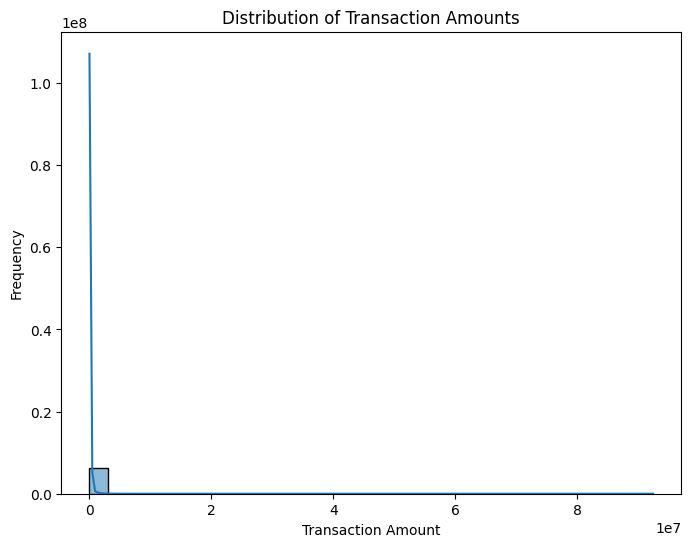

In [13]:
# Set figure size before the plot
plt.figure(figsize=(8, 6))

# Plot histogram with KDE
sns.histplot(df['amount'], kde=True, bins=30)

# Add labels and title
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Amounts')

# Show the plot
plt.show()


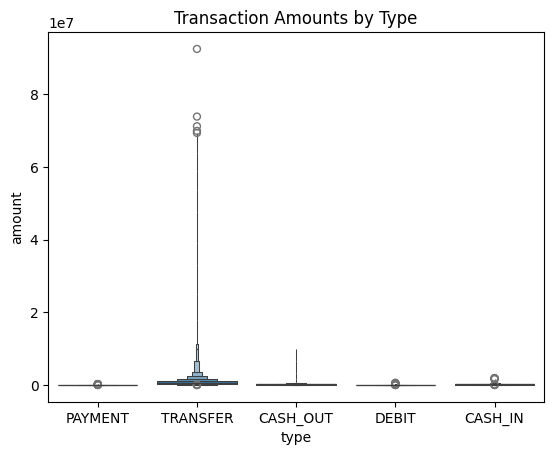

In [14]:
# Boxplot: Transaction amount by type
sns.boxenplot(x='type', y='amount', data=df)
plt.title('Transaction Amounts by Type')
plt.show()

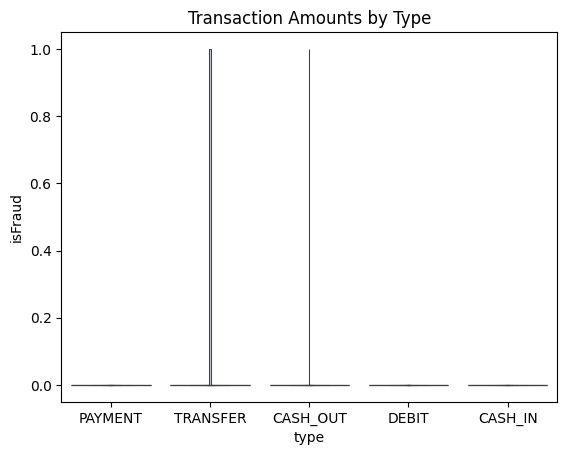

In [15]:
# Boxplot: Transaction amount by type
sns.boxenplot(x='type', y='isFraud', data=df)
plt.title('Transaction Amounts by Type')
plt.show()

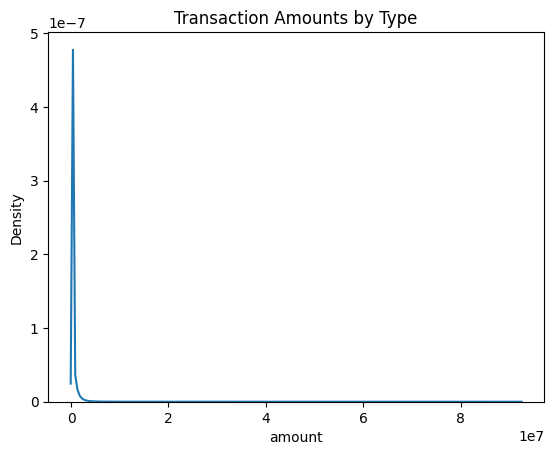

In [16]:
# Boxplot: Transaction amount by type
sns.kdeplot(df['amount'])
plt.title('Transaction Amounts by Type')
plt.show()

In [17]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### Use Z-Score to detect outliers in 'amount'

In [18]:
from scipy.stats import zscore
df['amount_zscore'] = zscore(df['amount'])
outliers = df[df['amount_zscore'].abs() > 3]
print(f"Number of outliers in 'amount': {len(outliers)}")


Number of outliers in 'amount': 44945


In [19]:
from scipy.stats import zscore

# Calculate Z-scores for all numeric columns
numeric_cols = df.select_dtypes(exclude=['object'])
z_scores = numeric_cols.apply(zscore)

# Find outliers in each numeric column
outliers = (z_scores.abs() > 3).sum()

# Print the number of outliers for each numeric column
for col, count in outliers.items():
    print(f"Number of outliers in '{col}': {count}")


Number of outliers in 'step': 66620
Number of outliers in 'amount': 44945
Number of outliers in 'oldbalanceOrg': 155140
Number of outliers in 'newbalanceOrig': 155931
Number of outliers in 'oldbalanceDest': 79846
Number of outliers in 'newbalanceDest': 75166
Number of outliers in 'isFraud': 8213
Number of outliers in 'isFlaggedFraud': 16
Number of outliers in 'amount_zscore': 44945
